In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [61]:
image = cv2.imread('input/sudoku.tif')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

optimized_img = cv2.equalizeHist(image)

rows, cells = optimized_img.shape

In [62]:
def detect_top_left_area():
    for i in range(rows):
        for j in range(cells):
            if optimized_img[i,j] != 255  :
                return i, j
                          
def detect_right_down_area():
    for i in range(rows-1,0,-1):
        for j in range(cells-1,0,-1):
            if optimized_img[i,j] != 255  :                
                return i, j
            
x1,y1 = detect_top_left_area()
x2, y2 = detect_right_down_area()

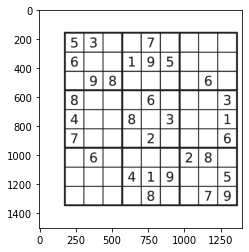

In [63]:
plt.imshow(optimized_img, cmap = 'gray')

-1

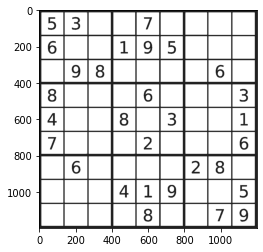

In [64]:
sudoku_table = optimized_img[x1:x2 , y1:y2]
plt.imshow(sudoku_table, cmap = 'gray')
cv2.imwrite("Output.jpg",sudoku_table)
cv2.waitKey()

In [65]:
width, height = sudoku_table.shape

width_cell = width // 9
height_cell = height // 9

In [68]:
def detect_white_cells(image):
    counter = 0
    rows, cols = image.shape
    ten_persent_rows = rows//10
    ten_persent_cols = cols//10
    
    for i in range(ten_persent_rows, rows-ten_persent_rows):
        for j in range(ten_persent_cols, cols-ten_persent_cols):
            if image[i,j] != 255:
                counter +=1
    return counter

In [70]:
counter = 0
value = (width_cell * height_cell) / 35

for i in range(0, width, width_cell):
    for j in range(0, height, height_cell):
            single_cell = sudoku_table[i:i+width_cell, j:j+height_cell]
            if single_cell.shape == (width_cell, height_cell):
                if detect_white_cells(single_cell) > value:
                    cv2.imwrite(f"Output/cell{counter}.jpg",single_cell)
                    counter += 1